## Project #5: Survival Analysis: Cox Proportional Hazards Regression and Kaplan Meier Analysis

Lillian Jensen

**Goal**

Students will use R to conduct and interpret a Cox Proportional Hazards Regression and Kaplan Meier Analyses and compare the results. 

Note: We are using data from the Framingham Heart Study for this analysis.  Framingham is one of the longest running longitudinal studies following the same population for several decades.  You can access more about the study [here](https://www.framinghamheartstudy.org/)  if you wish to learn more about it.

In this problem set, you will be comparing Kaplan Meier Analysis results with the Cox Regression results.


---

## Part 1

Run a Cox Proportional Hazards Regression using the following variables from the dataset: TimeDeathYears as the “Time” variable. Death as the “Status” variable.  Use cursmoke, diabetes, educ, prevchd, age, bmi, and sex as the covariates.  For the categorical variables, make sure that not a current smoker, no diabetes, the lowest education category, no CHD, and female sex are all reference categories (All of these are the lowest coded values for each). As a refresher:

Import your data, account for missing values if necessary, determine which variables are categorical (see the codebook). For categorical variables, remember to convert them to factor variables


In [30]:
# Setting up code environment
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(survival))

In [31]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\HM 878 730 Clements - Survival Analysis R Data.csv")

In [32]:
colnames(df)

[1] "randid"         "TimeDeathYears" "death"          "cursmoke"      
 [5] "diabetes"       "educ"           "prevchd"        "age"           
 [9] "bmi"            "sex"

In [33]:
summary(df)

     randid        TimeDeathYears      death           cursmoke     
 Min.   :   2448   Min.   : 2.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:2509944   1st Qu.:15.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :5050572   Median :15.00   Median :0.0000   Median :0.0000  
 Mean   :5028933   Mean   :13.57   Mean   :0.2375   Mean   :0.3435  
 3rd Qu.:7501310   3rd Qu.:15.00   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :9999312   Max.   :15.00   Max.   :1.0000   Max.   :1.0000  
                                                                    
    diabetes            educ          prevchd            age       
 Min.   :0.00000   Min.   :1.000   Min.   :0.0000   Min.   :44.00  
 1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:54.00  
 Median :0.00000   Median :2.000   Median :0.0000   Median :60.00  
 Mean   :0.07784   Mean   :2.014   Mean   :0.1103   Mean   :60.65  
 3rd Qu.:0.00000   3rd Qu.:3.000   3rd Qu.:0.0000   3rd Qu.:67.00  
 Max.   :1.00000   Max.   :4.000   Max. 

In [34]:
df$cursmoke <- factor(df$cursmoke, levels = c(0,1), labels = c('Not a smoker','Smoker'))
df$diabetes <- factor(df$diabetes, levels = c(0, 1), labels = c("Not diabetic", "Diabetic"))
df$educ <- factor(df$educ, levels = c(1, 2, 3, 4),
                  labels = c("0-11 years", "HSdiploma.or.GED", 
                             "some.college",
                             "college.degree"))
df$prevchd <- factor(df$prevchd, levels = c(0, 1), labels = c("No", "Yes"))
df$sex <- factor(df$sex, levels = c(0, 1), labels = c("Female", "Male"))

In [38]:
head(df)

,randid,TimeDeathYears,death,cursmoke,diabetes,educ,prevchd,age,bmi,sex
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
1,2448,15,0,Not a smoker,Not diabetic,college.degree,No,52,NA,Male
2,6238,15,0,Not a smoker,Not diabetic,HSdiploma.or.GED,No,58,28.50,Female
3,11252,15,0,Smoker,Not diabetic,some.college,No,58,24.61,Female
4,11263,15,0,Not a smoker,Diabetic,HSdiploma.or.GED,No,55,31.17,Female
5,12806,15,0,Smoker,Not diabetic,HSdiploma.or.GED,No,57,22.02,Female
6,14367,15,0,Not a smoker,Not diabetic,0-11 years,No,64,25.72,Male


Looks good. Let's create the Cox Proportional Hazards model

In [39]:
cox.model <- coxph(
                    Surv(TimeDeathYears, death) ~ 
                    cursmoke + diabetes + prevchd + 
                    age + bmi + sex + educ,
                    data=df
                    )

summary(cox.model)

Call:
coxph(formula = Surv(TimeDeathYears, death) ~ cursmoke + diabetes + 
    prevchd + age + bmi + sex + educ, data = df)

  n= 3165, number of events= 746 
   (98 observations deleted due to missingness)

                          coef exp(coef)  se(coef)      z Pr(>|z|)    
cursmokeSmoker        0.432597  1.541256  0.081165  5.330 9.83e-08 ***
diabetesDiabetic      0.741622  2.099338  0.100251  7.398 1.39e-13 ***
prevchdYes            0.790013  2.203425  0.086862  9.095  < 2e-16 ***
age                   0.092917  1.097370  0.005068 18.333  < 2e-16 ***
bmi                  -0.012792  0.987290  0.009667 -1.323  0.18575    
sexMale               0.672732  1.959583  0.075393  8.923  < 2e-16 ***
educHSdiploma.or.GED -0.007861  0.992169  0.092149 -0.085  0.93201    
educsome.college     -0.158231  0.853652  0.111205 -1.423  0.15477    
educcollege.degree   -0.454487  0.634773  0.131159 -3.465  0.00053 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

              

**Interpretation**

_________________________exp(coef) exp(-coef)  lower .95  upper .95    z Pr(>|z|) 


cursmoke_______________1.5413     0.6488    1.3146    1.8070    5.330 9.83e-08 ***

        Current smokers had 54% higher risk of dying compared to the reference category (nonsmokers). These results were significant, with p-value < 0.000
         
diabetes_______________2.0993     0.4763    1.7248    2.5551    7.398 1.39e-13 ***

        Folks with diabetes had 110% higher risk of dying compared to the reference category (no diabetes). These results were significant, with p-value < 0.000

prevchd________________2.2034     0.4538    1.8585    2.6124    9.095  < 2e-16 ***

        The presence of congestive heart failure increased risk of death by 120% compared to the reference (no CHD), with p-value < 0.000

age____________________1.0974     0.9113    1.0865    1.1083   18.333  < 2e-16 ***

        Each year of life increased risk of death by 9.7%, with a p-value < 0.000

bmi____________________0.9873     1.0129    0.9688    1.0062   -1.323  0.18575  

        These results are not significant. P-value > 0.05 and CI includes the value zero. If the results were significant, we would say that for each bmi point increase, risk of death decreased by 1.1%

sex____________________1.9596     0.5103    1.6904    2.2716    8.923  < 2e-16 ***

        Male sex assignment increased risk of death by 96% compared to the reference category (female). These results are significant, with p-value < 0.000

HSdiploma.or.GED______0.9922     1.0079    0.8282    1.1886   -0.085  0.93201   

        These results are not significant. P-value > 0.05 and CI includes the value zero. If the results were significant, we would say that having a high school diploma decreased risk of death by 0.8% compared to the reference category (0-11 years)

some.college___________0.8537     1.1714    0.6865    1.0615   -1.423  0.15477    

        These results are not significant. P-value > 0.05 and CI includes the value zero. If the results were significant, we would say that having some college decreased risk of death by 14.6% compared to the reference category (0-11 years)

college.degree_________0.6348     1.5754    0.4909    0.8208   -3.465  0.00053 ***

        Having a college degree decreased the risk of death by 36.5% compared to the reference category (0-11 years). These results are significant, with p-value = 0.001

In [40]:
survival.diabetes <- survfit(
                            Surv(TimeDeathYears, death) ~ 
                            diabetes, 
                            data=df
                            )

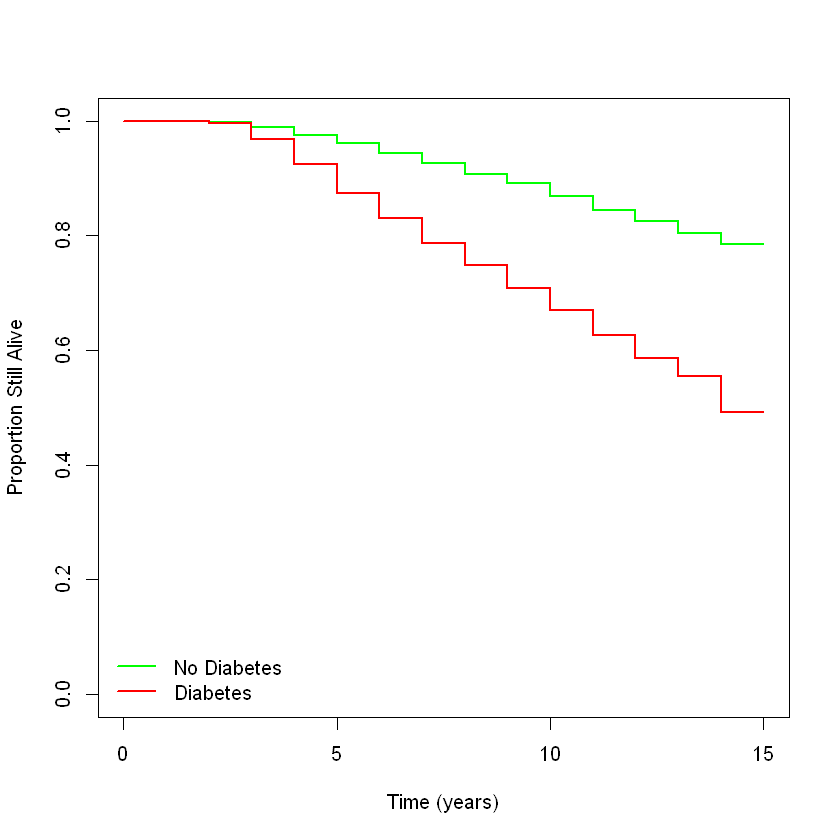

In [41]:
plot(
    survival.diabetes, 
    xlab='Time (years)', 
    ylab='Proportion Still Alive',
    lwd=2,
    conf.int=F, 
    col = c('green','red')
    ) 

legend(
    'bottomleft',
    legend = c('No Diabetes','Diabetes'),
    col=c('green','red'),
    lwd=2,bty='n'
    )

**Interpretation**

This survival curve displays the decreased overall survival experienced by those with diabetes. At 5 years, diabetes survival was approximately 85% and the no-diabetes group's survival was nearly 100%. At 15 years, diabetes' survival was approximately 45% and the no-diabetes group's survival was approximately 80%

---

## Part 2

Run Kaplan Meier analyses with “Time Since Baseline” as the Time to Event variable, and death as the Event Status Variable.  Run five separate analyses (survival curves) with each of the categorical variables as the “Factor” variable. You can only include one IV at a time, so you’ll need to run it five times (one for each IV) to get the results. You can’t used this procedure for the continuous numerical variables (age, bmi).


In [81]:
km <- survfit(Surv(TimeDeathYears, death) ~ cursmoke, data=df)

km
print('---')
print(km, print.rmean = T)
print('---')
print(km, probs = c(0.5))
print('---')
survdiff(Surv(TimeDeathYears, death) ~ cursmoke, data = df)


Call: survfit(formula = Surv(TimeDeathYears, death) ~ cursmoke, data = df)

                         n events median 0.95LCL 0.95UCL
cursmoke=Not a smoker 2142    501     NA      NA      NA
cursmoke=Smoker       1121    274     NA      NA      NA

[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ cursmoke, data = df)

                         n events rmean* se(rmean) median 0.95LCL 0.95UCL
cursmoke=Not a smoker 2142    501   13.6    0.0649     NA      NA      NA
cursmoke=Smoker       1121    274   13.5    0.0922     NA      NA      NA
    * restricted mean with upper limit =  15 
[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ cursmoke, data = df)

                         n events median 0.95LCL 0.95UCL
cursmoke=Not a smoker 2142    501     NA      NA      NA
cursmoke=Smoker       1121    274     NA      NA      NA
[1] "---"


Call:
survdiff(formula = Surv(TimeDeathYears, death) ~ cursmoke, data = df)

                         N Observed Expected (O-E)^2/E (O-E)^2/V
cursmoke=Not a smoker 2142      501      510     0.173     0.517
cursmoke=Smoker       1121      274      265     0.333     0.517

 Chisq= 0.5  on 1 degrees of freedom, p= 0.5 

Mean survival time for smokers: 13.6 years

Mean survival time for nonsmokers: 13.5 years

This is a statistically insignificant result, as seen in the log-rank p-value = 0.5

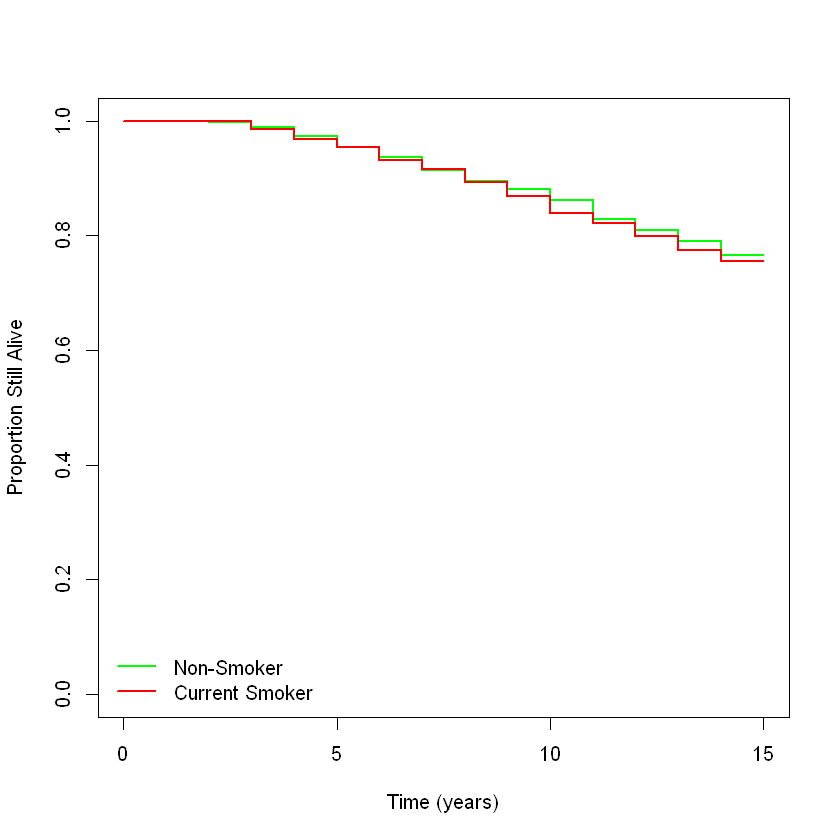

In [82]:
plot(
    km,
    xlab='Time (years)', 
    ylab='Proportion Still Alive',
    lwd=2,
    conf.int=F, 
    col = c('green','red')
    ) 

legend(
    'bottomleft',
    legend = c('Non-Smoker','Current Smoker'),
    col=c('green','red'),
    lwd=2,bty='n'
    )

survival probability at 10 years for nonsmokers ~ 94%

survival probability at 10 years for smokers ~ 92%

---

In [83]:
km <- survfit(Surv(TimeDeathYears, death) ~ diabetes, data=df)

km
print('---')
print(km, print.rmean = T)
print('---')
print(km, probs = c(0.5))
print('---')
survdiff(Surv(TimeDeathYears, death) ~ diabetes, data = df)


Call: survfit(formula = Surv(TimeDeathYears, death) ~ diabetes, data = df)

                         n events median 0.95LCL 0.95UCL
diabetes=Not diabetic 3009    646     NA      NA      NA
diabetes=Diabetic      254    129     14      13      NA

[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ diabetes, data = df)

                         n events rmean* se(rmean) median 0.95LCL 0.95UCL
diabetes=Not diabetic 3009    646   13.7    0.0525     NA      NA      NA
diabetes=Diabetic      254    129   11.8    0.2540     14      13      NA
    * restricted mean with upper limit =  15 
[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ diabetes, data = df)

                         n events median 0.95LCL 0.95UCL
diabetes=Not diabetic 3009    646     NA      NA      NA
diabetes=Diabetic      254    129     14      13      NA
[1] "---"


Call:
survdiff(formula = Surv(TimeDeathYears, death) ~ diabetes, data = df)

                         N Observed Expected (O-E)^2/E (O-E)^2/V
diabetes=Not diabetic 3009      646    724.5       8.5       133
diabetes=Diabetic      254      129     50.5     121.8       133

 Chisq= 133  on 1 degrees of freedom, p= <2e-16 

Mean survival time for diabetics: 11.8 years

Mean survival time for nondiabetics: 13.7 years

This is a statistically significant result, as seen in the log-rank p-value < 0.5

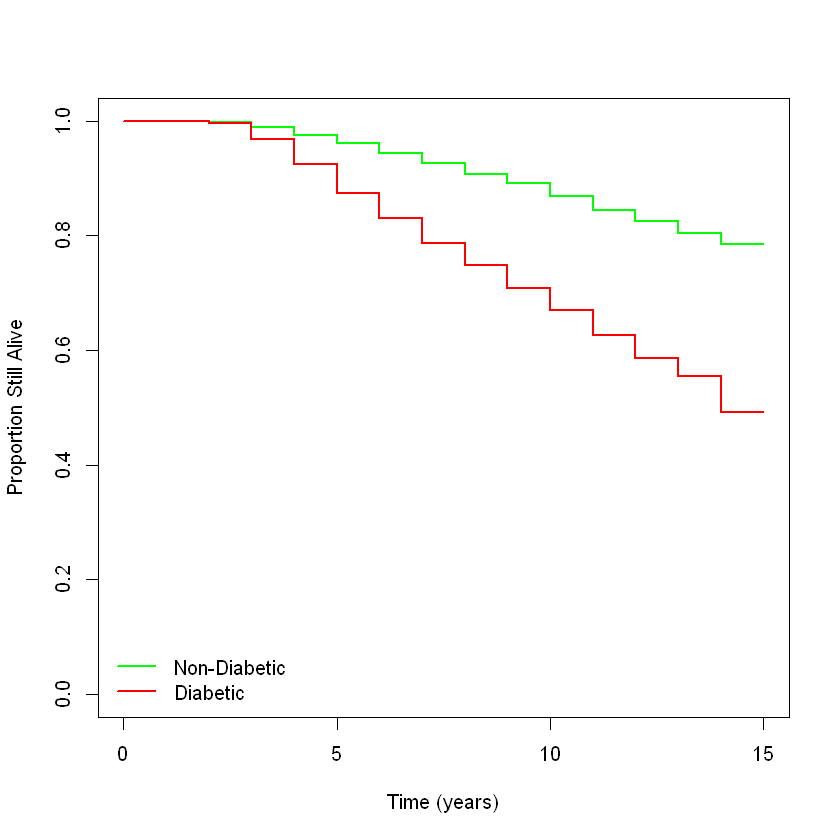

In [84]:
plot(
    km,
    xlab='Time (years)', 
    ylab='Proportion Still Alive',
    lwd=2,
    conf.int=F, 
    col = c('green','red')
    ) 

legend(
    'bottomleft',
    legend = c('Non-Diabetic','Diabetic'),
    col=c('green','red'),
    lwd=2,bty='n'
    )

survival probability at 10 years for nondiabetics ~ 92%

survival probability at 10 years for diabetics ~ 65%

---

In [85]:
km <- survfit(Surv(TimeDeathYears, death) ~ prevchd, data=df)

km
print('---')
print(km, print.rmean = T)
print('---')
print(km, probs = c(0.5))
print('---')
survdiff(Surv(TimeDeathYears, death) ~ prevchd, data = df)


Call: survfit(formula = Surv(TimeDeathYears, death) ~ prevchd, data = df)

               n events median 0.95LCL 0.95UCL
prevchd=No  2903    582     NA      NA      NA
prevchd=Yes  360    193     14      12      NA

[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ prevchd, data = df)

               n events rmean* se(rmean) median 0.95LCL 0.95UCL
prevchd=No  2903    582   13.8    0.0522     NA      NA      NA
prevchd=Yes  360    193   11.7    0.2077     14      12      NA
    * restricted mean with upper limit =  15 
[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ prevchd, data = df)

               n events median 0.95LCL 0.95UCL
prevchd=No  2903    582     NA      NA      NA
prevchd=Yes  360    193     14      12      NA
[1] "---"


Call:
survdiff(formula = Surv(TimeDeathYears, death) ~ prevchd, data = df)

               N Observed Expected (O-E)^2/E (O-E)^2/V
prevchd=No  2903      582    704.1      21.2       237
prevchd=Yes  360      193     70.9     210.4       237

 Chisq= 237  on 1 degrees of freedom, p= <2e-16 

Mean survival time for prevchd: 11.7 years

Mean survival time for no prevchd: 13.8 years

This is a statistically significant result, as seen in the log-rank p-value < 0.5

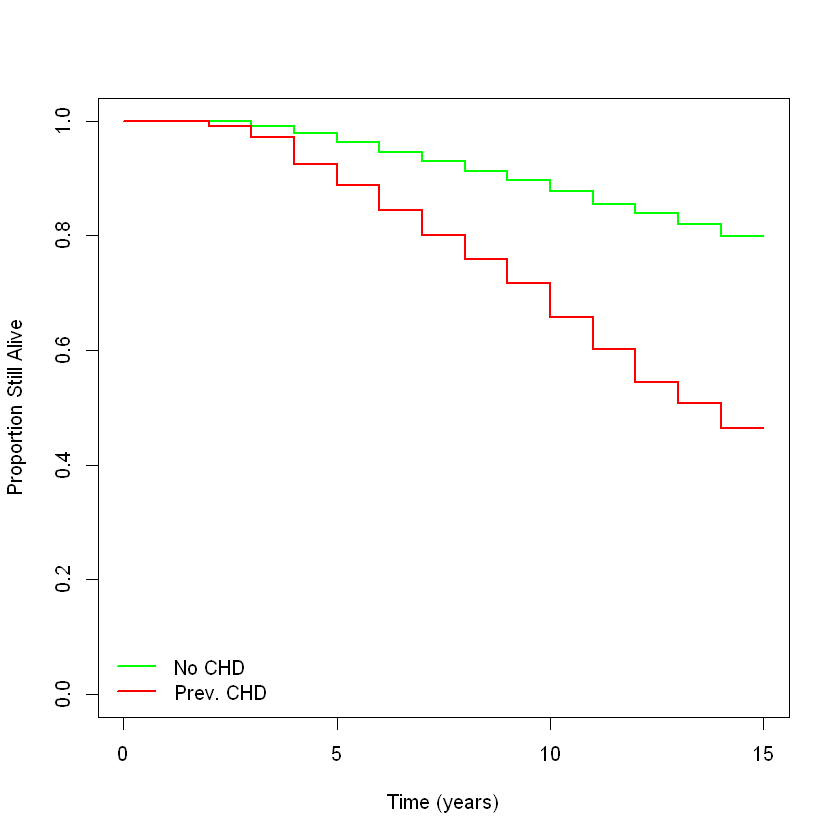

In [86]:
plot(
    km,
    xlab='Time (years)', 
    ylab='Proportion Still Alive',
    lwd=2,
    conf.int=F, 
    col = c('green','red')
    ) 

legend(
    'bottomleft',
    legend = c('No CHD','Prev. CHD'),
    col=c('green','red'),
    lwd=2,bty='n'
    )

survival probability at 10 years for no CHD ~ 92%

survival probability at 10 years for Prev. CHD ~ 63%

---

In [87]:
km <- survfit(Surv(TimeDeathYears, death) ~ sex, data=df)

km
print('---')
print(km, print.rmean = T)
print('---')
print(km, probs = c(0.5))
print('---')
survdiff(Surv(TimeDeathYears, death) ~ sex, data = df)


Call: survfit(formula = Surv(TimeDeathYears, death) ~ sex, data = df)

              n events median 0.95LCL 0.95UCL
sex=Female 1876    345     NA      NA      NA
sex=Male   1387    430     NA      NA      NA

[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ sex, data = df)

              n events rmean* se(rmean) median 0.95LCL 0.95UCL
sex=Female 1876    345   13.9    0.0635     NA      NA      NA
sex=Male   1387    430   13.1    0.0894     NA      NA      NA
    * restricted mean with upper limit =  15 
[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ sex, data = df)

              n events median 0.95LCL 0.95UCL
sex=Female 1876    345     NA      NA      NA
sex=Male   1387    430     NA      NA      NA
[1] "---"


Call:
survdiff(formula = Surv(TimeDeathYears, death) ~ sex, data = df)

              N Observed Expected (O-E)^2/E (O-E)^2/V
sex=Female 1876      345      458      28.0      70.1
sex=Male   1387      430      317      40.5      70.1

 Chisq= 70.1  on 1 degrees of freedom, p= <2e-16 

Mean survival time for males: 13.1 years

Mean survival time for females: 13.9 years

This is a statistically significant result, as seen in the log-rank p-value < 0.5

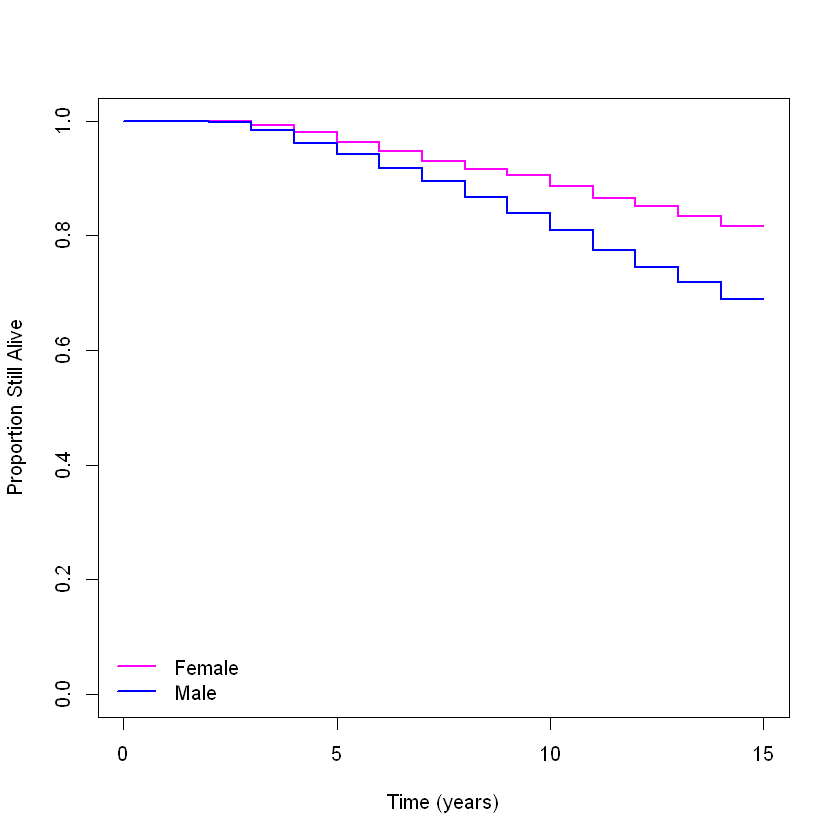

In [89]:
plot(
    km,
    xlab='Time (years)', 
    ylab='Proportion Still Alive',
    lwd=2,
    conf.int=F, 
    col = c('magenta','blue')
    ) 

legend(
    'bottomleft',
    legend = c('Female','Male'),
    col=c('magenta','blue'),
    lwd=2,bty='n'
    )

survival probability at 10 years for females ~ 92%

survival probability at 10 years ~ 80%

---

In [90]:
km <- survfit(Surv(TimeDeathYears, death) ~ educ, data=df)

km
print('---')
print(km, print.rmean = T)
print('---')
print(km, probs = c(0.5))
print('---')
survdiff(Surv(TimeDeathYears, death) ~ educ, data = df)


Call: survfit(formula = Surv(TimeDeathYears, death) ~ educ, data = df)

   82 observations deleted due to missingness 
                         n events median 0.95LCL 0.95UCL
educ=0-11 years       1281    381     NA      NA      NA
educ=HSdiploma.or.GED  967    194     NA      NA      NA
educ=some.college      542    108     NA      NA      NA
educ=college.degree    391     71     NA      NA      NA

[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ educ, data = df)

   82 observations deleted due to missingness 
                         n events rmean* se(rmean) median 0.95LCL 0.95UCL
educ=0-11 years       1281    381   13.2    0.0936     NA      NA      NA
educ=HSdiploma.or.GED  967    194   13.8    0.0911     NA      NA      NA
educ=some.college      542    108   13.9    0.1188     NA      NA      NA
educ=college.degree    391     71   14.0    0.1275     NA      NA      NA
    * restricted mean with upper limit =  15 
[1] "---"
Call: survfit(formula = Surv(TimeDeathYears, death) ~ educ, data = df)

   82 observations deleted due to missingness 
                         n events median 0.95LCL 0.95UCL
educ=0-11 years       1281    381     NA      NA      NA
educ=HSdiploma.or.GED  967    194     NA      NA      NA
educ=some.college      542    108     NA      NA      NA
educ=college.degree    391     71     NA      NA      NA
[1] "---"


Call:
survdiff(formula = Surv(TimeDeathYears, death) ~ educ, data = df)

n=3181, 82 observations deleted due to missingness.

                         N Observed Expected (O-E)^2/E (O-E)^2/V
educ=0-11 years       1281      381    291.6     27.40     45.74
educ=HSdiploma.or.GED  967      194    234.0      6.84     10.14
educ=some.college      542      108    131.9      4.32      5.36
educ=college.degree    391       71     96.5      6.74      7.91

 Chisq= 46.4  on 3 degrees of freedom, p= 5e-10 

Mean survival time for educ=0-11 years: 13.2 years

Mean survival time for educ=HSdiploma.or.GED: 13.8 years 

Mean survival time for some.college: 13.9 years

Mean survival time for college.degree: 14.0 years


This is a statistically significant result, as seen in the log-rank p-value < 0.5

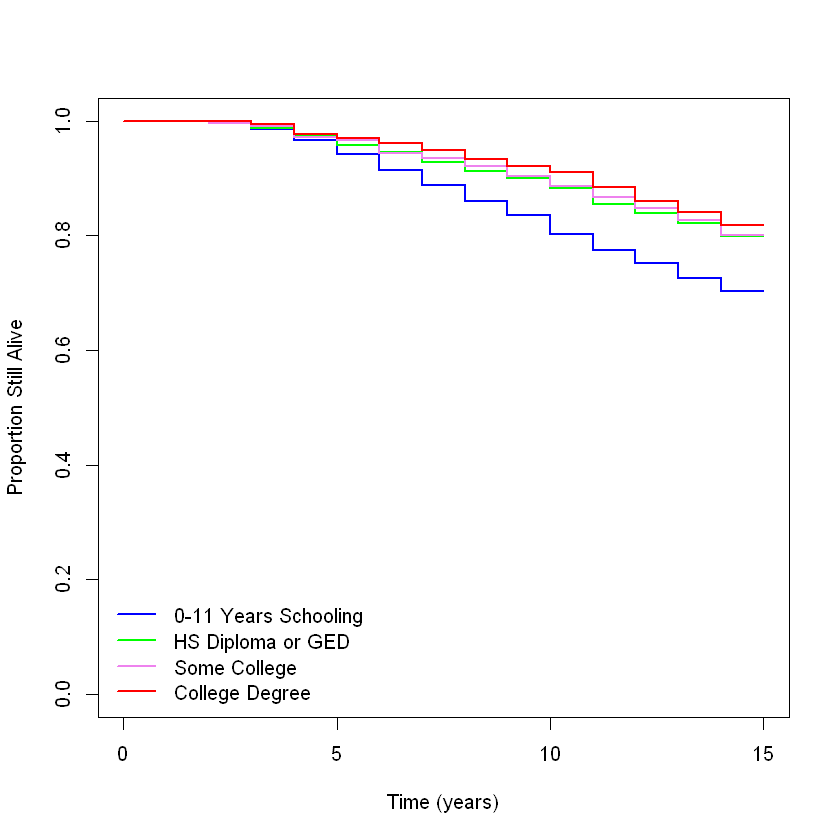

In [91]:
plot(
    km,
    xlab='Time (years)', 
    ylab='Proportion Still Alive',
    lwd=2,
    conf.int=F, 
    col = c('blue','green','violet','red')
    ) 

legend(
    'bottomleft',
    legend = c('0-11 Years Schooling','HS Diploma or GED','Some College','College Degree'),
    col=c('blue','green','violet','red'),
    lwd=2,bty='n'
    )

survival probability at 10 years for 0-11 years schooling ~ 80%

survival probability at 10 years for HS Diploma or GED ~ 88%

survival probability at 10 years for some college ~ 89%

survival probability at 10 years for college degree ~ 96%

---

2. Compare and contrast the “Log Rank Mantel-Cox Test” for each Kaplan Meier analysis to the model fit statistics from the Cox Proportional Hazards Regression Do the results from each align with each other? Describe why or why not. In other words, are the results you get from one expected, based on the results of the other?


Log Rank Matel-Cox p-values

    Schooling: p= 5e-10 
    Sex: p= <2e-16
    prevCHD:  p= <2e-16
    Diabetes: p= <2e-16 
    Smoking: p= 0.5 

Cox Proportional Hazards p-values

    Schooling: p= (0.93, 0.15, 0.001) 
    Sex: p= <2e-16
    prevCHD:  p= <2e-16
    Diabetes: p= <2e-16 
    Smoking: p= 9.83e-08

It is surprising to me that the cursmoker/non-cursmoker results are so different. The Cox model showed a significant difference in hazard of death between the two groups, but the Kaplan-Meier model's p-value for the groups was insignificant. 

I am not surprised by the discrepency between the tests for the schooling groups. The Log Rank Matel test collapsed the group's p-values to demonstrate that there is significant survival variance within the group. This may be explained by the overall differences between the lowest level of schooling and every other level. 

---

3. Finally, describe situations when you would use these two analyses. When would you use a Cox Regression and when would you use a Kaplan Meier analysis? Is one better than the other?

Cox Proportional Hazards gives the instantaneous risk of the event (death) at a particular time, given survival up to that time. 

Kaplan-Meier represents the probability of survival from the point of origin to some time beyond the measured time T. 

The inverse of the Kaplan-Meier would represent the risk of death from the point of origin to some time beyond the measured time T. This may be a better way to compare the two analyses 

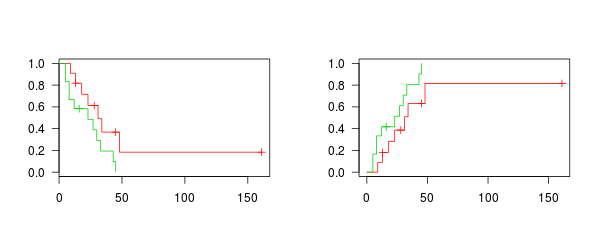

Suppose we have a Survival Curve on the left and its inverse, a Death Curve (that would make a great band name) on the right. Cox proportional hazards gives the risk of death in a single instant - this would be the slope, or rate of change, of the curve on the right. Kaplan-Meier gives the cumulative chance of survival up to a specified point in time, or in other words, the inverse of the cumulative risk of death. This would be the inverse of the area under the Death Curve between origin (0) and the specified time. 

Kaplan-Meier is more intuitive. For instance, breast cancer outcomes are measured  with 5-year survival rates. Investigaters may follow women with breast cancer that's been treated with chemo/radiation/hormones, and compare their survival to the survival of women with untreated breast cancer. This is the area under the survival curve between 0-5 years, and would be measured with the Kaplan-Meier method. 

In contrast, the Cox proportional hazards model is a statistical modeling technique that can be used to to identify the impact of other confounding variables on survival time. This model assumes that the hazard rate is a function of its independent variables. 

In the breast cancer example, Cox Proportional Hazards might be used in scientific research where breast cancer treatment is examined alongside other covariates such as age, bmi, etc. 

Going back to the discrepency between our two models for cursmoker/non-cursmokers, we might say that there is less of a difference in overall survival between the groups (log rank), but smoking status does have a significant impact on risk of death at any given moment, in combination with the other covariates. 